In [134]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [135]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import time

# Data preparation

In [136]:
data = pd.read_csv("C:/Users/louis/Documents/ISF/ML2/data_examen.csv", sep = ';')

In [137]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,Y
0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,...,2.11,0.7,0.0,0.000,1.975,0.370,35.461,95,461,1
1,0.0,0.00,0.00,0.00,0.0,0.00,0.0,3.33,0.00,0.00,...,0.00,0.0,0.0,0.352,0.352,0.000,4.000,11,36,1
2,0.0,0.59,0.00,0.00,0.0,0.59,0.0,0.00,0.00,1.18,...,0.00,0.0,0.0,0.257,0.000,0.000,8.586,66,249,1
3,0.3,0.00,0.61,0.00,0.0,0.92,0.3,2.15,0.61,0.00,...,1.23,0.0,0.3,0.100,1.053,0.351,3.884,66,303,1
4,0.0,0.53,0.53,0.53,0.0,0.53,0.0,0.53,0.00,1.06,...,1.06,0.0,0.0,0.087,0.877,0.000,3.400,61,187,1


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      269 non-null    float64
 1   X2      269 non-null    float64
 2   X3      269 non-null    float64
 3   X4      269 non-null    float64
 4   X5      269 non-null    float64
 5   X6      269 non-null    float64
 6   X7      269 non-null    float64
 7   X8      269 non-null    float64
 8   X9      269 non-null    float64
 9   X10     269 non-null    float64
 10  X11     269 non-null    float64
 11  X12     269 non-null    float64
 12  X13     269 non-null    float64
 13  X14     269 non-null    float64
 14  X15     269 non-null    float64
 15  X16     269 non-null    float64
 16  X17     269 non-null    float64
 17  X18     269 non-null    float64
 18  X19     269 non-null    float64
 19  X20     269 non-null    int64  
 20  X21     269 non-null    int64  
 21  Y       269 non-null    int64  
dtypes:

In [139]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,Y
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.112305,0.291152,0.265911,0.313755,0.087807,0.542788,0.093792,0.244089,0.122156,0.277435,...,0.774498,0.090000,0.083755,0.121309,0.357104,0.057688,5.112922,53.881041,246.572491,0.434944
std,0.321830,1.559141,0.506822,0.829713,0.253429,0.908444,0.297380,0.683562,0.402623,0.781799,...,1.205342,0.323178,0.341209,0.177272,1.255913,0.142572,17.182637,136.297964,481.486426,0.496674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.625000,7.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.066000,0.043000,0.000000,2.360000,15.000000,84.000000,0.000000
75%,0.000000,0.000000,0.400000,0.310000,0.000000,0.770000,0.000000,0.130000,0.000000,0.000000,...,1.260000,0.000000,0.000000,0.175000,0.345000,0.019000,4.093000,47.000000,212.000000,1.000000
max,2.320000,14.280000,3.700000,7.690000,1.880000,5.260000,1.810000,7.350000,3.330000,6.660000,...,8.000000,2.950000,4.410000,1.336000,19.131000,1.223000,251.000000,1488.000000,3525.000000,1.000000


## train test split

In [140]:
Y = data['Y']
X = data.copy()
del X["Y"]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [142]:
X_train.shape

(215, 21)

In [143]:
y_train.shape

(215,)

In [144]:
X_test.shape

(54, 21)

In [145]:
y_test.shape

(54,)

In [146]:
XX_train = X_train.values
XX_test = X_test.values

# Random numbers

In [147]:
random_numbers = random.choice(a = range(XX_train.shape[0]), replace = True, size = 50)
print(random_numbers)

[ 98 206  53  46 204  48  97 192 126 187 202  92  61 122 136 198  49 167
  47  10 112   0  18 189 151 211 126 155 110 131 196  12 138  61  86 210
 202  44 196  55 214  18 163 181 117  70 113  32  76 169]


# Gram Matrix

In [148]:
def K(x1, x2, gamma = 1/21):
    tmp = -gamma * linalg.norm(x1 - x2)**2
    return exp(tmp)

#test
print(K(XX_train[12,:], XX_train[1,:]))


0.0


In [149]:
def compute_W(XX_train, random_numbers, gamma = 1/21):
    start_time = time.time()
    c = len(random_numbers)
    W = zeros((c, c))
    index0 = 0
    for i in random_numbers:
        index1 = 0
        for j in random_numbers:
            W[index0, index1] = K(XX_train[i, :], XX_train[j, :], gamma)
            index1 += 1
        index0 += 1
    print("Execution time: ", time.time() - start_time, ' s')
    return W

In [150]:
W = compute_W(XX_train, random_numbers)
W

Execution time:  0.11362671852111816  s


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.06144696e-43, 1.35078221e-28, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 3.06144696e-43, ...,
        1.00000000e+00, 1.20146759e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.35078221e-28, ...,
        1.20146759e-02, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [151]:
mean(W, axis = 0)

array([0.02      , 0.02      , 0.02007471, 0.02      , 0.02160427,
       0.02      , 0.02      , 0.02350756, 0.0573169 , 0.02      ,
       0.04009366, 0.02898014, 0.0579717 , 0.02123797, 0.02      ,
       0.05652507, 0.0830453 , 0.05829609, 0.03189584, 0.0200356 ,
       0.03799798, 0.02      , 0.04015145, 0.05091405, 0.0830453 ,
       0.02024838, 0.0573169 , 0.02      , 0.02324672, 0.08196786,
       0.04708376, 0.02040957, 0.02      , 0.0579717 , 0.02      ,
       0.02898026, 0.04009366, 0.02117162, 0.04708376, 0.02      ,
       0.05039798, 0.04015145, 0.03424162, 0.02576423, 0.02      ,
       0.04701377, 0.06509892, 0.05735025, 0.04139243, 0.02      ])

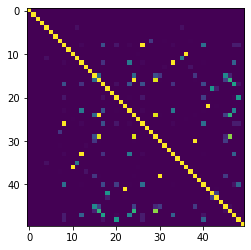

In [152]:
imshow(W)

# partial SVD

In [153]:
def partial_svd(W, k = 10):
    start_time = time.time()
    U, S, Vh = linalg.svd(W) #SVD on W
    Uk = U[:, :k] #Uk, k first columns of U
    Sk_invsqrt = S[:k]**(-1/2) #Sk, k first lines & columns of S
    print("Execution time: ", time.time() - start_time, ' s')
    return dot(Uk, diag(Sk_invsqrt)) #** term by term

In [154]:
Mk = partial_svd(W)
Mk.shape

Execution time:  0.010993480682373047  s


(50, 10)

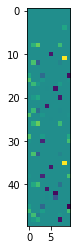

In [155]:
imshow(Mk)

# C, Z computations

In [156]:
def compute_C(X, random_numbers, X_train = XX_train, gamma = 1/21):
    start_time = time.time()
    c = len(random_numbers)
    C = zeros((len(X), c))
    for i in range(len(X)):
        for j in range(c):
            C[i, j] = K(X[i, :], X_train[random_numbers[j], :], gamma)
    print("Execution time: ", time.time() - start_time, ' s')
    return C

In [157]:
Ctrain = compute_C(XX_train, random_numbers)
Ctrain.shape

Execution time:  0.276125431060791  s


(215, 50)

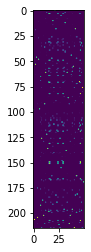

In [158]:
imshow(Ctrain)

In [159]:
Ctest = compute_C(XX_test, random_numbers)
Ctest.shape

Execution time:  0.058251380920410156  s


(54, 50)

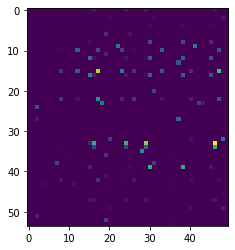

In [160]:
imshow(Ctest)

In [161]:
start_time = time.time()
Ztrain = dot(Ctrain, Mk)
print("execution time : ",time.time() - start_time, " s")
Ztrain.shape

execution time :  0.0009996891021728516  s


(215, 10)

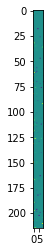

In [162]:
imshow(Ztrain)

In [163]:
start_time = time.time()
Ztest = dot(Ctest, Mk)
print("execution time : ",time.time() - start_time, " s")
Ztest.shape

execution time :  0.0009996891021728516  s


(54, 10)

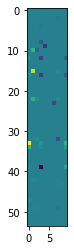

In [164]:
imshow(Ztest)

# SVM with initial data

In [165]:
machine1 = LinearSVC(dual = False, max_iter = 2000) #default C = 1
machine1.fit(X_train, y_train)
accuracy_score(y_test, machine1.predict(X_test))

0.8333333333333334

# SVM with Z

In [166]:
machine2 = LinearSVC(dual = False, max_iter = 2000)
machine2.fit(Ztest, y_test)
accuracy_score(y_test, machine2.predict(Ztest))

0.5925925925925926

# Conculsions

Définitivement la méthode avec matrice de Gram est moins efficace que la sortie SVC standard.
En revanche les dimensions de la matrice d'apprentissage sont bien plus petites (auto réduction des dimensions).

On pouvait s'attendre à ce que cela marche mieux mais je remarque que dans la ligne d'exemple dans le sujet, il semble possible que dans le svm($Y\sim \dots$, data =), le Y n'ait jamais été sorti des données, ce qui veut dire d'une part que Z dépend de Y et que d'autre part le modèle apprend $Y\sim Y \dots$,etc. (on prédit avec l'oracle).

Il aurait peut être fallu garder un set de train (X, y) et les séparer à l'entrée du modèle.

Quant aux temps de calculs, tout est quasi-instantanné (matrices de petites dimensions + matrices creuses).

Une renormalisation des données avant procédure aurait peut être permis d'améliorer les résultats.